In [3]:
import matplotlib.pyplot as plt

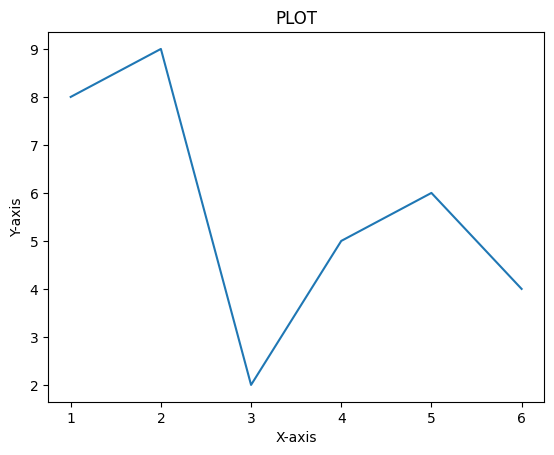

In [16]:
x = [1,2,3,4,5,6]
y = [8,9,2,5,6,4]

plt.plot(x,y)
plt.title("PLOT")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [27]:
import requests
import pandas as pd
from io import StringIO

URL = "https://en.wikipedia.org/wiki/2026_Winter_Olympics_medal_table"
headers = {"User-Agent": "Mozilla/5.0"}

# 1) Fetch HTML
resp = requests.get(URL, headers=headers, timeout=30)
resp.raise_for_status()

# 2) Parse all tables from the page
tables = pd.read_html(StringIO(resp.text))

# 3) Pick the medal table (the one that has Gold/Silver/Bronze/Total)
def is_medal_table(df: pd.DataFrame) -> bool:
    cols = [str(c).strip().lower() for c in df.columns]
    return all(x in cols for x in ["gold", "silver", "bronze", "total"])

medals = next(df for df in tables if is_medal_table(df))

# 4) Remove the Totals row like:
# 26  Totals (26 entries)  Totals (26 entries)  85  87  84  256
# (most robust: filter Rank to numeric rows only)
medals = medals[pd.to_numeric(medals["Rank"], errors="coerce").notna()].reset_index(drop=True)

medals


,Rank,NOC,Gold,Silver,Bronze,Total
0,1,Norway,15,8,9,32
1,2,Italy*,9,4,12,25
2,3,United States,7,11,6,24
3,4,Netherlands,6,6,1,13
4,5,Sweden,6,5,3,14
5,6,Germany,5,8,8,21
6,7,Austria,5,8,4,17
7,8,France,5,7,4,16
8,9,Switzerland,5,4,3,12
9,10,Japan,4,6,10,20


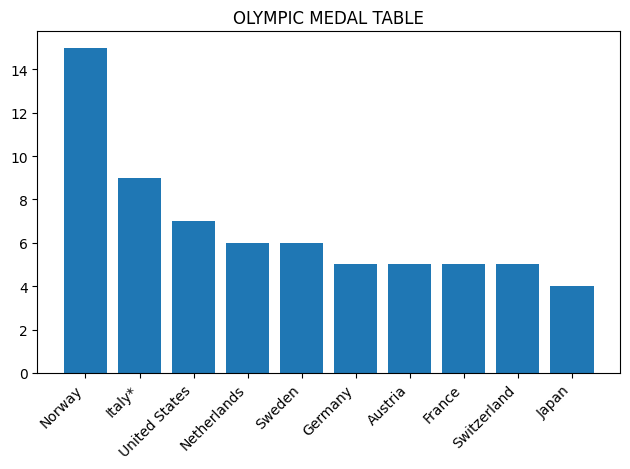

In [34]:
import matplotlib.pyplot as plt

top = medals.sort_values("Gold", ascending=False).head(10)
plt.title("OLYMPIC MEDAL TABLE")
plt.bar(top["NOC"], top["Gold"])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
